In [2]:
import pandas as pd
import catboost
import numpy as np
import shap
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from platform import python_version
from Mold2_pywrapper import Mold2
from rdkit.Chem import AllChem
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, KFold, GroupKFold
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

input_file = 'Zr.xlsx'
df = pd.read_excel(input_file)


In [3]:
def RDkit_descriptors(smiles, suffix=""):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    if suffix:
        desc_names = [name + suffix for name in desc_names]
    Mol_descriptors = []
    for mol in mols:
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors, desc_names    

In [4]:
Mol_descriptors_HBA,desc_names = RDkit_descriptors(df['SMILES'])
df_target = pd.DataFrame(Mol_descriptors_HBA,columns=desc_names)

[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerator
[12:04:02] DEPRECATION WARNING: please use MorganGenerat

In [5]:
Mol_descriptors, desc_names_sol = RDkit_descriptors(df['SM_Sol'], suffix="_sol")
df_solvent = pd.DataFrame(Mol_descriptors, columns=desc_names_sol)

[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerator
[12:04:04] DEPRECATION WARNING: please use MorganGenerat

In [10]:
df_all = pd.concat([df_target, df_solvent, df['T']], axis=1)
df_all

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd_sol,fr_sulfone_sol,fr_term_acetylene_sol,fr_tetrazole_sol,fr_thiazole_sol,fr_thiocyan_sol,fr_thiophene_sol,fr_unbrch_alkane_sol,fr_urea_sol,T
0,14.267032,14.267032,0.224370,-8.383926,0.411369,71.965517,536.562,529.506,534.867517,153,...,0,0,0,0,0,0,0,0,0,294.99
1,5.306190,3.035529,1.026270,-5.306190,0.630282,137.866667,263.410,259.378,261.936005,64,...,0,0,0,0,0,0,0,0,0,310.15
2,14.726523,14.726523,0.943546,-11.785024,0.315287,63.170732,773.684,767.636,771.778448,227,...,0,0,0,0,0,0,0,0,0,298.15
3,5.411230,3.139696,0.581825,-5.411230,0.596517,135.187500,278.445,271.389,276.958931,70,...,0,0,0,0,0,0,0,0,0,298.15
4,13.708281,13.708281,0.004464,-10.044379,0.284864,94.296296,511.488,509.472,509.823306,142,...,0,0,0,0,0,0,0,0,0,298.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3.444722,2.865417,0.813333,-3.444722,0.554052,106.857143,271.559,247.367,270.092505,80,...,0,0,0,0,0,0,0,0,0,298.15
68,5.330648,3.095463,0.545301,-5.330648,0.539131,114.952381,347.572,331.444,346.029905,100,...,0,0,0,0,0,0,0,0,0,298.15
69,4.476380,4.476380,0.000000,-1.376806,0.339507,9.875000,466.724,448.580,463.979862,128,...,0,0,0,0,0,0,0,0,0,298.15
70,5.206096,2.765000,0.006042,-5.206096,0.420775,16.827586,477.892,431.524,476.269707,162,...,0,0,0,0,0,0,0,0,0,298.15


R2 = 0.437 ± 0.241
RMSE = 165.236 ± 19.24
MAE = 113.418 ± 4.115


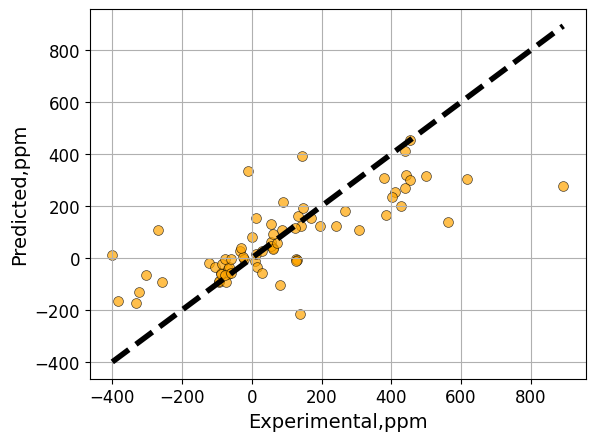

In [20]:
import pandas as pd
import catboost
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

columns_to_drop = ['SMILES', 'SM_Sol']
X = df_all.values
Y = df['SH'].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)

Y_pred, Y_true = [], []
r2_scores, rmse_scores, mae_scores = [], [], []

for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = catboost.CatBoostRegressor(silent=True, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    Y_pred.extend(y_pred)
    Y_true.extend(y_test)

    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

print('R2 = {} ± {}'.format(round(np.mean(r2_scores), 3), round(np.std(r2_scores), 3)))
print('RMSE = {} ± {}'.format(round(np.mean(rmse_scores), 3), round(np.std(rmse_scores), 3)))
print('MAE = {} ± {}'.format(round(np.mean(mae_scores), 3), round(np.std(mae_scores), 3)))

fig, ax = plt.subplots()
ax.scatter(
    Y_true, Y_pred,
    color='orange',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.7,
    s=50
)
ax.tick_params(axis='both', labelsize=12)
ax.plot([min(Y_true), max(Y_true)], [min(Y_true), max(Y_true)], "k--", lw=4)
ax.grid(True)
ax.set_xlabel("Experimental,ppm", fontsize=14)
ax.set_ylabel("Predicted,ppm",  fontsize=14)
plt.savefig('Zr.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
import shap
import pandas as pd
import catboost
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

RMSE: 176.279
RMSE: 168.0202
RMSE: 189.5196
RMSE: 160.4157
RMSE: 131.9443


<Figure size 640x480 with 0 Axes>

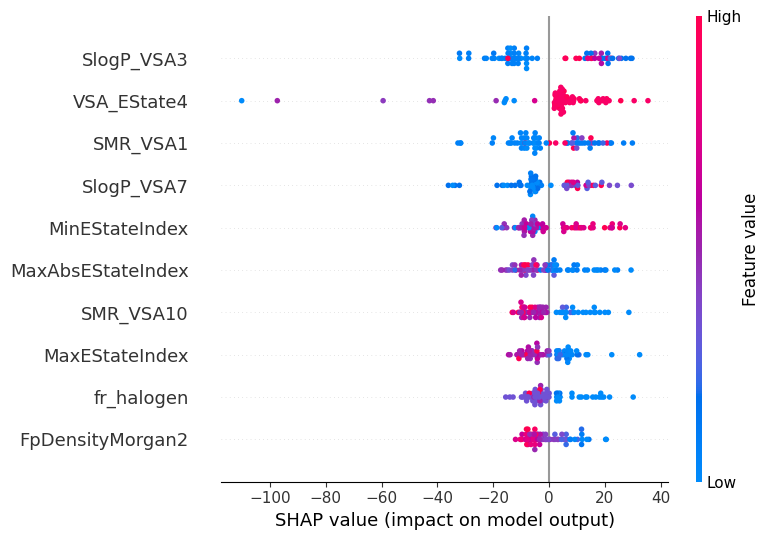

In [13]:
X = df_all
Y = df['SH']

CV = KFold(n_splits=5, shuffle=True, random_state=42)
ix_training, ix_test = [], []

for train_index, test_index in CV.split(X):
    ix_training.append(train_index)
    ix_test.append(test_index)

SHAP_values_per_fold = []


for i, (train_outer_ix, test_outer_ix) in enumerate(zip(ix_training, ix_test)):

    X_train, X_test = X.iloc[train_outer_ix, :], X.iloc[test_outer_ix, :]
    Y_train, Y_test = Y.iloc[train_outer_ix], Y.iloc[test_outer_ix]

    model = catboost.CatBoostRegressor(silent=True, random_seed=42)
    fit = model.fit(X_train, Y_train)
    yhat = fit.predict(X_test)
    result = mean_squared_error(Y_test, yhat)
    print('RMSE:', round(np.sqrt(result), 4))

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    SHAP_values_per_fold.extend(shap_values)
new_index = [ix for ix_test_fold in ix_test for ix in ix_test_fold]
import matplotlib.pyplot as plt
import numpy as np

plt.set_cmap("plasma")

shap_fig = plt.figure()
shap.summary_plot(np.array(SHAP_values_per_fold), X.reindex(new_index), max_display=10)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel("SHAP value (impact on model output)", fontsize=14)
shap_fig.savefig('Shap_Zr.jpeg', dpi=300, bbox_inches='tight')
plt.close(shap_fig)

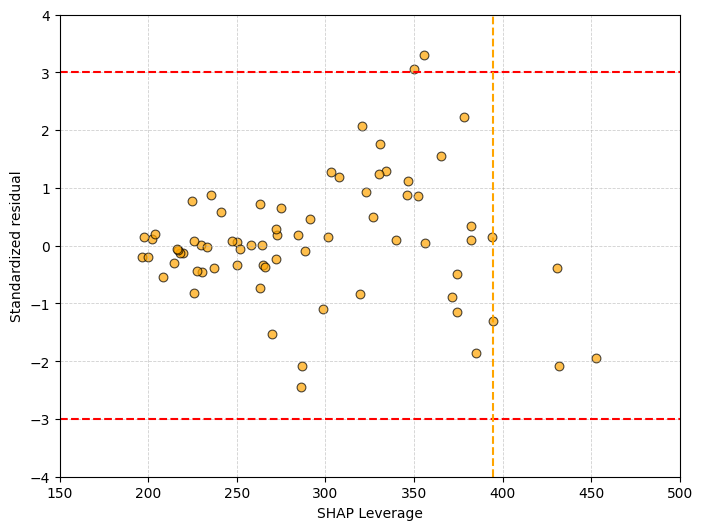

In [18]:
X = df_all.values
y = df['SH'].values

all_leverages = np.zeros(len(X))
all_residuals = np.zeros(len(X))

CV = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(CV.split(X)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = catboost.CatBoostRegressor(verbose=0)
    model.fit(X_train, y_train)
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    shap_matrix = np.abs(shap_values)
    leverage_shap = shap_matrix.sum(axis=1) 

    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    std_residuals = residuals / np.std(residuals)

    all_leverages[test_idx] = leverage_shap
    all_residuals[test_idx] = std_residuals

h_star = np.percentile(all_leverages, 95)
out_of_leverage = np.sum(all_leverages > h_star)
out_of_residuals = np.sum((all_residuals < -3) | (all_residuals > 3))

plt.figure(figsize=(8, 6))
plt.scatter(
    all_leverages, 
    all_residuals, 
    c='orange',        
    edgecolor='black',  
    linewidth=0.8,      
    alpha=0.7,        
    s=40,               
    label=''
)
plt.axhline(y=3, color='red', linestyle='--', label='')
plt.axhline(y=-3, color='red', linestyle='--')
plt.axvline(x=h_star, color='orange', linestyle='--', label=f'Leverage threshold (95% percentile) h* = {h_star:.3f}')
plt.xlabel('SHAP Leverage')
plt.ylabel('Standardized residual')
plt.title("")
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.xlim(150, 500)
plt.ylim(-4, 4)
plt.savefig('Williams_plot_Zr.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
!python3 --version

Python 3.8.20


In [16]:
pip list

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.5.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
backcall                  0.2.0
beautifulsoup4            4.12.3
bel-resources             0.0.3
bioregistry               0.11.17
bleach                    6.1.0
bounded-pool-executor     0.0.3
catboost                  1.2.7
CDK_pywrapper             0.1.0
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.1.7
click-plugins             1.1.1
cloudpickle               3.0.0
comm                      0.2.2
contourpy                 1.1.1
curies                    0.7.10
cycler                    0.12.1
debugpy                   1.8.6
decorator      